## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import random
import networkx as nx

## Loading the Dataset

In [2]:
df = pd.read_csv('recipes.csv')

## Displaying the First Few Rows of the Dataset

In [3]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [4]:
df1 = pd.DataFrame({
    'recipe': df['RecipeIngredientParts'].iloc[:20000]
})

print(df1.head())

                                              recipe
0  c("blueberries", "granulated sugar", "vanilla ...
1  c("saffron", "milk", "hot green chili peppers"...
2  c("sugar", "lemons, rind of", "lemon, zest of"...
3  c("extra firm tofu", "eggplant", "zucchini", "...
4  c("plain tomato juice", "cabbage", "onion", "c...


In [5]:
import pandas as pd

def clean_ingredients(entry):
    # Extract ingredients starting from the 4th character
    ingredients = entry[3:]
    # Remove parentheses and quotes
    cleaned_ingredients = ingredients.replace('(', '').replace(')', '').replace('"', '')
    return cleaned_ingredients

# Assuming 'df1' is defined elsewhere and 'recipe' column exists
# Apply the function to each row in the 'recipe' column
df1['cleaned_ingredients'] = df1['recipe'].apply(clean_ingredients)

# If you want to create a new dataframe with cleaned column
# This will create a dataframe where each row corresponds to cleaned ingredients from df1
new_df = pd.DataFrame({
    'CleanedIngredientsColumn': df1['cleaned_ingredients']
})

print(new_df.head(3))



                            CleanedIngredientsColumn
0  blueberries, granulated sugar, vanilla yogurt,...
1  saffron, milk, hot green chili peppers, onions...
2  sugar, lemons, rind of, lemon, zest of, fresh ...


In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Assuming new_df['CleanedIngredientsColumn'] contains comma-separated lists of ingredients
# Splitting the cleaned ingredients column into a list of lists for transaction encoding
transactions = new_df['CleanedIngredientsColumn'].str.split(", ").tolist()
ingredients_df=pd.DataFrame({'Items': [row for row in transactions]})
# Function to format and print transactions

transactions


[['blueberries', 'granulated sugar', 'vanilla yogurt', 'lemon juice'],
 ['saffron',
  'milk',
  'hot green chili peppers',
  'onions',
  'garlic',
  'clove',
  'peppercorns',
  'cardamom seed',
  'cumin seed',
  'poppy seed',
  'mace',
  'cilantro',
  'mint leaf',
  'fresh lemon juice',
  'plain yogurt',
  'boneless chicken',
  'salt',
  'ghee',
  'onion',
  'tomatoes',
  'basmati rice',
  'long-grain rice',
  'raisins',
  'cashews',
  'eggs'],
 ['sugar',
  'lemons',
  'rind of',
  'lemon',
  'zest of',
  'fresh water',
  'fresh lemon juice'],
 ['extra firm tofu',
  'eggplant',
  'zucchini',
  'mushrooms',
  'soy sauce',
  'low sodium soy sauce',
  'olive oil',
  'maple syrup',
  'honey',
  'red wine vinegar',
  'lemon juice',
  'garlic cloves',
  'mustard powder',
  'black pepper'],
 ['plain tomato juice', 'cabbage', 'onion', 'carrots', 'celery'],
 ['graham cracker crumbs',
  'sugar',
  'butter',
  'sugar',
  'cornstarch',
  'salt',
  'milk',
  'vanilla extract',
  'water',
  'gelatin

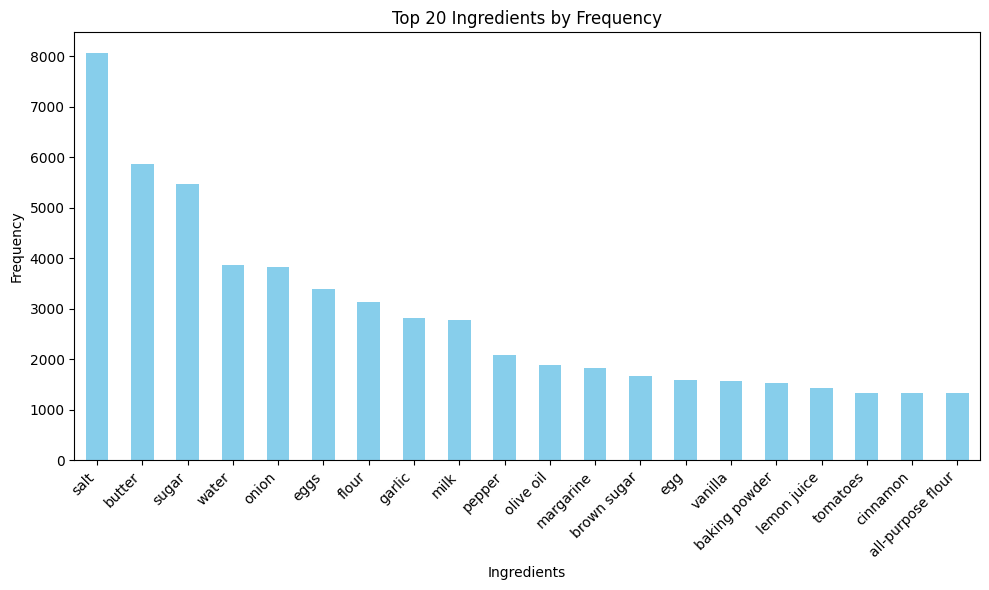

In [7]:

flat_df = pd.DataFrame(ingredients_df['Items'].explode())

# Count the frequencies of each ingredient
ingredient_counts = flat_df['Items'].value_counts()
# Select the top 15 ingredients
top_ingredients = ingredient_counts.head(20)

# Plotting the bar graph with different colors for each bar
plt.figure(figsize=(10, 6))
top_ingredients.plot(kind='bar', color='skyblue')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 20 Ingredients by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

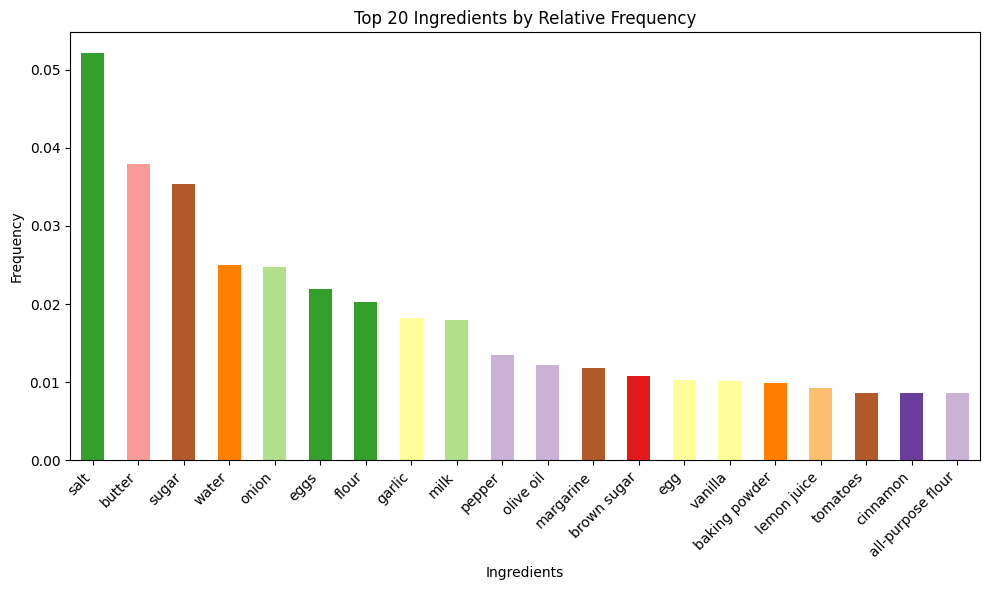

In [8]:

flat_df = pd.DataFrame(ingredients_df['Items'].explode())

# Count the frequencies of each ingredient
ingredient_counts = flat_df['Items'].value_counts()
# Select the top 15 ingredients

# Calculate relative frequencies by dividing each frequency by the total number of ingredients
total_ingredients = len(flat_df)
relative_frequencies = ingredient_counts / total_ingredients

# Select the top 15 ingredients
top_relative_frequencies = relative_frequencies.head(20)

# Generate a list of random colors for each bar
colors = [plt.cm.Paired(random.random()) for _ in range(len(top_ingredients))]

# Plotting the bar graph with different colors for each bar
plt.figure(figsize=(10, 6))
top_relative_frequencies.plot(kind='bar', color=colors)
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.title('Top 20 Ingredients by Relative Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Preprocess the data for Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(apriori_df, min_support=0.0045, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.2)

# Display summary of association rules
print(rules)
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

rules.to_csv('association_rules.csv', index=False)


                  antecedents                            consequents  \
0                      (salt)                        (Dijon mustard)   
1             (Dijon mustard)                                 (salt)   
2                      (salt)                        (Tabasco sauce)   
3             (Tabasco sauce)                                 (salt)   
4      (Worcestershire sauce)                               (butter)   
...                       ...                                    ...   
13343               (vanilla)     (flour, butter, salt, sugar, eggs)   
13344                (butter)    (flour, vanilla, salt, sugar, eggs)   
13345                  (salt)  (flour, vanilla, butter, sugar, eggs)   
13346                 (sugar)   (flour, vanilla, butter, salt, eggs)   
13347                  (eggs)  (flour, vanilla, butter, salt, sugar)   

       antecedent support  consequent support  support  confidence      lift  \
0                 0.38840             0.01560  0.00525 

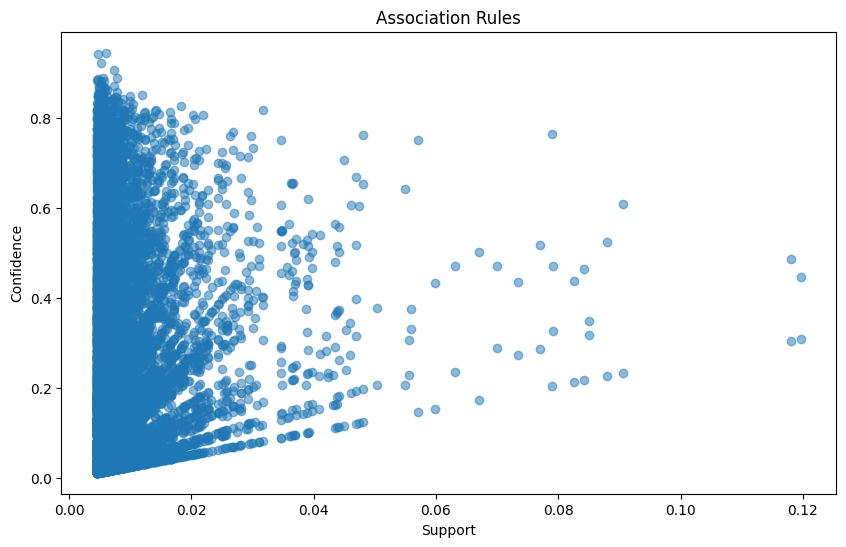

In [10]:
# Plotting the association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()

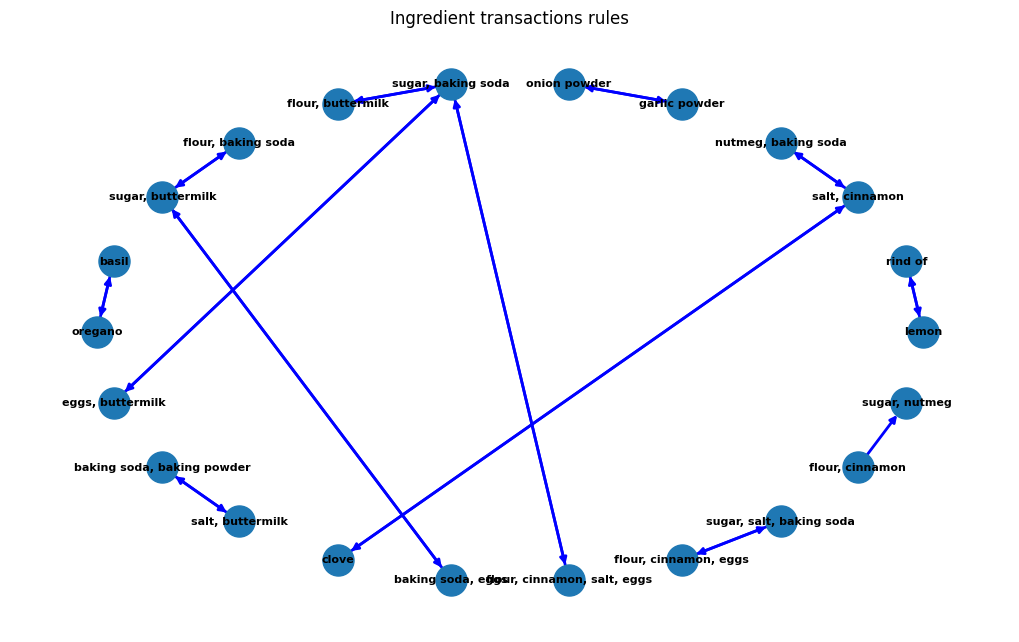

In [11]:
# Create a directed graph from the association rules
top_rules = rules.sort_values(by='lift', ascending=False).head(25)
G = nx.DiGraph()
for idx, rule in top_rules.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['lift'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
pos = nx.circular_layout(G)  # Circular layout for spacing between nodes
# Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_weight='bold', edge_color='b', width=2.0,
        edge_cmap=plt.cm.Blues, edge_vmin=min(top_rules['lift']), edge_vmax=max(top_rules['lift']))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'lift'), font_size=8)

# edge_labels = {(source, target): f"Lift: {weight:.2f}" for source, target, weight in G.edges(data='weight')}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Ingredient transactions rules')
plt.show()

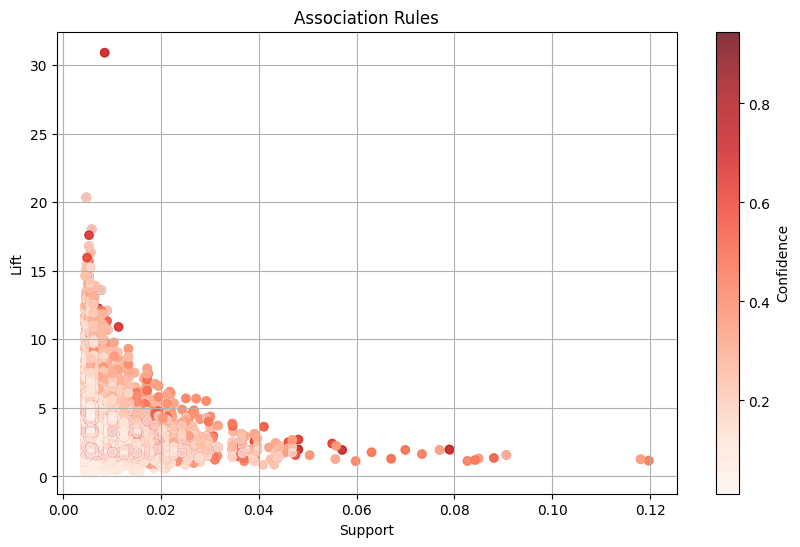

In [12]:
# Scatter plot with node size based on support, color based on lift, and brightness based on confidence
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['lift'], c=rules['confidence'], cmap='Reds', alpha=0.8)
plt.colorbar(scatter, label='Confidence')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Association Rules')
plt.grid(True)
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

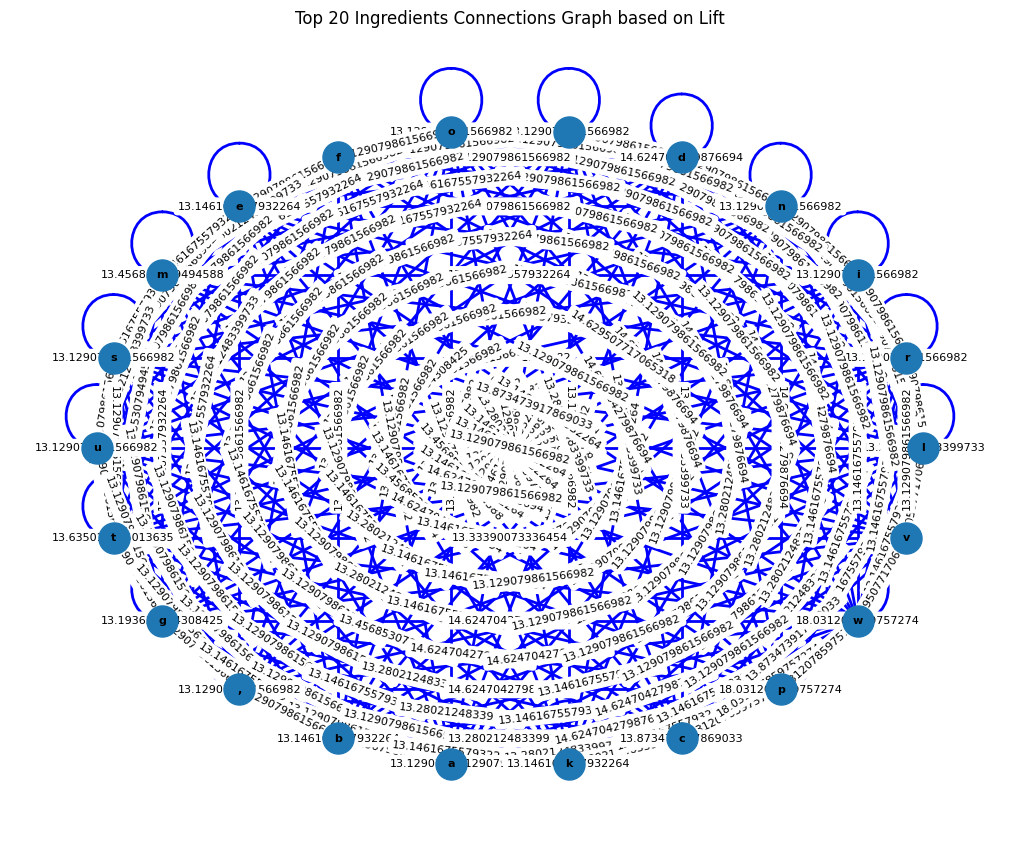

In [13]:
# Sort rules by lift and select top 20
top_rules = rules.sort_values(by='lift', ascending=False).head(70)
# Create a directed graph from the top association rules
G = nx.Graph()
for idx, rule in top_rules.iterrows():
    antecedents = rule['antecedents']
    consequents = rule['consequents']
    lift = rule['lift']
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, lift=lift)

# Draw the graph with adjusted text size and node size
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)  # Circular layout for spacing between nodes
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_weight='bold', edge_color='b', width=2.0,
        edge_cmap=plt.cm.Blues, edge_vmin=min(top_rules['lift']), edge_vmax=max(top_rules['lift']))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'lift'), font_size=8)
plt.title('Top 20 Ingredients Connections Graph based on Lift')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Lift')
plt.show()

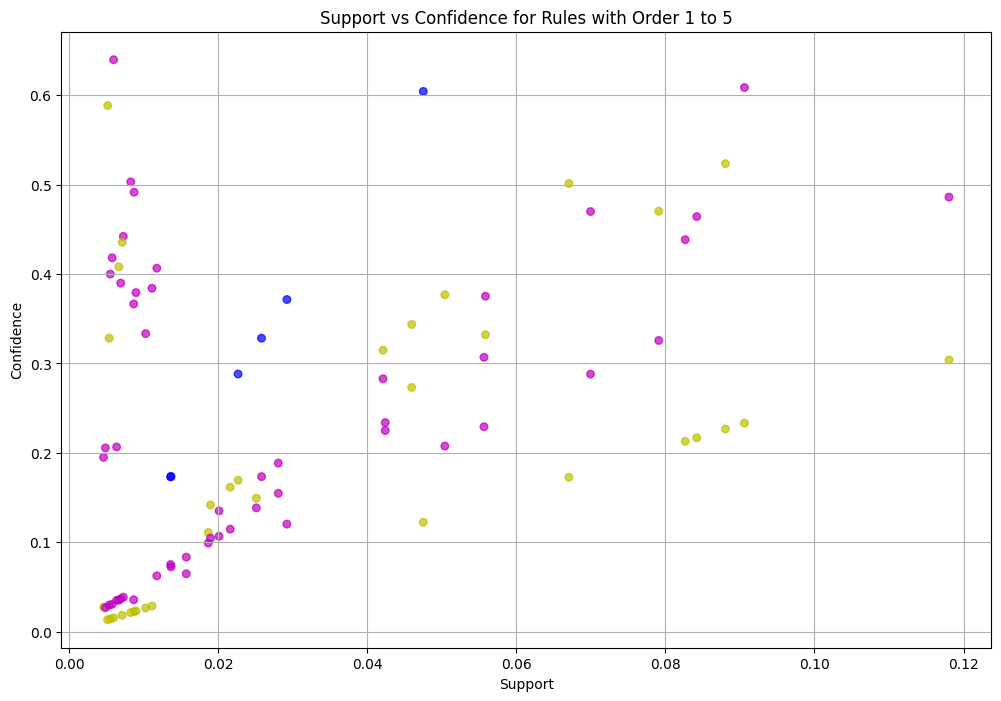

In [14]:
# Filter rules by order from 1 to 5
filtered_rules = rules[(rules['antecedents'].apply(len) <6) & (rules['consequents'].apply(len) <6)]

# Assigning colors based on order value
colors = np.where(filtered_rules['antecedents'].apply(len) == 1, 'r',  # Order 1 - Red
                  np.where(filtered_rules['antecedents'].apply(len) == 2, 'g',  # Order 2 - Green
                           np.where(filtered_rules['antecedents'].apply(len) == 3, 'b',  # Order 3 - Blue
                                    np.where(filtered_rules['antecedents'].apply(len) == 4, 'y',  # Order 4 - Yellow
                                             'm'  # Order 5 - Magenta
                                             )
                                    )
                           )
                  )

# Plotting the scatter plot for support vs confidence with color differentiation
plt.figure(figsize=(12, 8))
plt.scatter(filtered_rules['support'], filtered_rules['confidence'], s=30, alpha=0.7, c=colors)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence for Rules with Order 1 to 5')
plt.grid(True)
plt.show()

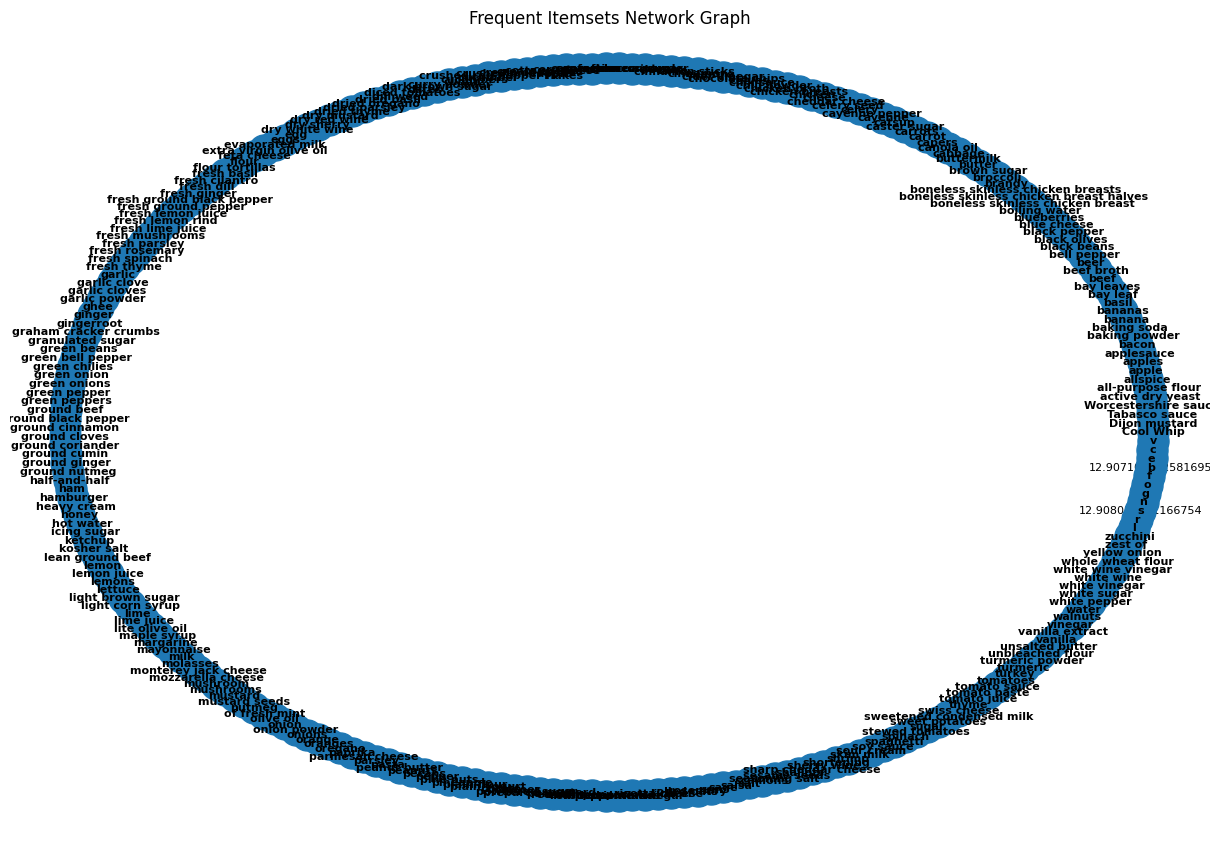

In [15]:
# Create a directed graph
top_rules_2 = rules.sort_values(by='lift', ascending=False).head(100)
G = nx.DiGraph()
# rules = top_rules.sort_values(by='lift', ascending=False).head(500)

# Add nodes for each itemset
for index, row in frequent_itemsets.iterrows():
    items = row['itemsets']
    support = row['support']
    for item in items:
        G.add_node(item, support=support)

# Add edges for association rules
for index, row in top_rules_2.iterrows():
    antecedent = next(iter(row['antecedents']))
    consequent = next(iter(row['consequents']))
    lift = row['lift']
    G.add_edge(antecedent, consequent, lift=lift)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)  # Circular layout for spacing between nodes

# pos = nx.spring_layout(G, seed=42)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_weight='bold', edge_color='b', width=2.0,
        edge_cmap=plt.cm.Blues, edge_vmin=min(top_rules_2['lift']), edge_vmax=max(top_rules_2['lift']))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'lift'), font_size=8)
plt.title('Frequent Itemsets Network Graph')
plt.show()

In [16]:
rules = pd.read_csv('association_rules.csv')


In [17]:
def check_ingredients(ingredients, itemset):
    return any(ingre in itemset for ingre in ingredients)



In [20]:
# Define the list of ingredients separated by commas
ingredient_list = ['sugar','milk']  # Update this with your ingredients

# Filter rules containing any of the specified ingredients in either antecedents or consequents
filtered_rules = rules[
    rules['antecedents'].apply(lambda x: check_ingredients(ingredient_list, x)) |
    rules['consequents'].apply(lambda x: check_ingredients(ingredient_list, x))
]

# Sort the filtered rules by lift or confidence to find the most associated ingredients
# Let's sort by lift
filtered_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Display the top alternative ingredients to butter
top_alternatives = filtered_rules.head()
top_alternatives


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7235,"sugar, baking soda","flour, buttermilk",0.03910,0.00770,0.0053,0.135550,17.603879,0.004999,1.147897,0.981574
7238,"flour, buttermilk","sugar, baking soda",0.00770,0.03910,0.0053,0.688312,17.603879,0.004999,3.082888,0.950513
7236,"sugar, buttermilk","flour, baking soda",0.00910,0.03465,0.0053,0.582418,16.808588,0.004985,2.311759,0.949144
7237,"flour, baking soda","sugar, buttermilk",0.03465,0.00910,0.0053,0.152958,16.808588,0.004985,1.169836,0.974265
7211,"eggs, buttermilk","sugar, baking soda",0.00785,0.03910,0.0049,0.624204,15.964292,0.004593,2.556971,0.944777


In [21]:
# Filter out rules where any ingredient appears both in antecedent and consequent
filtered_rules = filtered_rules[
    ~filtered_rules.apply(lambda row: any(ingre in row['antecedents'] and ingre in row['consequents'] for ingre in ingredient_list), axis=1)
]

# Get the first row of the filtered DataFrame
most_associated_ingredient = filtered_rules.iloc[0]['consequents']
most_associated_ingredient_next = filtered_rules.iloc[1]['consequents']

# Extract the ingredient from the frozenset
# most_associated_ingredient = list(most_associated_ingredient)

# Display the most associated ingredient with butter
most_associated_ingredient + ","+most_associated_ingredient_next


'flour, buttermilk,sugar, baking soda'